# Analysis of promising game platforms


## Contents:

<a href="#step_1">1. Data preparation</a>

<a href="#substep_1" style="margin-left: 20px;">1.1. Load data</a>

<a href="#substep_2" style="margin-left: 20px;">1.2. Rename columns</a>

<a href="#substep_3" style="margin-left: 20px;">1.3. Analyze missing values</a>

<a href="#substep_4" style="margin-left: 20px;">1.4. Change data types</a>

<a href="#substep_5" style="margin-left: 20px;">1.5. Calculate total sales</a>

<a href="#step_2">2. Exploratory analysis</a>

<a href="#substep_6" style="margin-left: 20px;">2.1. Determine a relevant time period</a>

<a href="#substep_7" style="margin-left: 20px;">2.2. Find promising platforms</a>

<a href="#substep_8" style="margin-left: 20px;">2.3. Estimate relationship between sales and critic, user scores</a>

<a href="#substep_9" style="margin-left: 20px;">2.4. Determine the most popular and profitable game genres</a>

<a href="#step_3">3. Portrait of typical regional users modelling</a>

<a href="#substep_10" style="margin-left: 20px;">3.1. Find the most popular platforms by region</a>

<a href="#substep_11" style="margin-left: 20px;">3.2. Find the most popular genres by region</a>

<a href="#substep_12" style="margin-left: 20px;">3.3. Estimate relationship between ESRB rating and regional sales</a>

<a href="#step_4">4. Hypotheses testing</a>

<a href="#substep_13" style="margin-left: 20px;">4.1. Hypothesis 1: XOne and PC have the same average user scores</a>

<a href="#substep_14" style="margin-left: 20px;">4.2. Hypothesis 2: Action and Sports genres have different user scores</a>

<a href="#conclusion"> Conclusion</a>

<h2><a id="step_1" style="color: black; text-decoration: none;"> 1. Data preparation </a></h2>

Import all the necessary libraries

In [1]:
#import all the necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from scipy import stats as st

<h3><a id="substep_1" style="color: black; text-decoration: none;">1.1. Load data</a></h3>

In [2]:
#load data & look at 5 first values
raw_data = pd.read_csv('games.csv')
raw_data.head()

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN


In [3]:
#look at basic info
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Problems identified:
- All columns names have capital letters, it's better to use small letters only 
- There are a lot of missing values that seem to be either human or techical error, some of them can be filled in
- Data types of some features does not reflect their meanings (`Year_of_Release` and `Critic_Score` should be integer, `User_Score` should be float)

<h3><a id="substep_2" style="color: black; text-decoration: none;">1.2. Rename columns</a></h3>

In [4]:
#rename columns
raw_data.columns = raw_data.columns.str.lower()

<h3><a id="substep_3" style="color: black; text-decoration: none;">1.3. Analyze missing values</a></h3>

In [5]:
#look at missing values in 'name'
raw_data[raw_data['name'].isna()]

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating
659,NaN,GEN,1993.0,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN
14244,NaN,GEN,1993.0,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN


In [6]:
#drop missing values in 'name'
raw_data = raw_data.dropna(subset = ['name'])

In [7]:
#look at unique values in 'year_of_release'
len(raw_data[raw_data['year_of_release'].isna()]['name'].unique())

232

In [8]:
#check game names of missing values in 'year_of_release' 
na_year_names = raw_data[raw_data['year_of_release'].isna()]['name'].unique()
year_names = raw_data[raw_data['year_of_release'] != 'nan']['name'].unique()

fill_na_names = []

for name in na_year_names:
    if name not in year_names:
        fill_na_names.append(name)
        
len(fill_na_names)

0

In [9]:
#check proportion of missing values in 'year_of_release' by genres
raw_data[raw_data['year_of_release'].isna()].groupby('genre')['genre'].count() \
/raw_data.groupby('genre')['genre'].count()

genre
Action          0.018403
Adventure       0.007675
Fighting        0.014134
Misc            0.016571
Platform        0.011261
Puzzle          0.018966
Racing          0.018415
Role-Playing    0.011348
Shooter         0.020408
Simulation      0.018328
Sports          0.017888
Strategy        0.014641
Name: genre, dtype: float64

In [10]:
#drop missing values in 'year_of_release'
raw_data = raw_data.dropna(subset = ['year_of_release']).reset_index(drop = True)

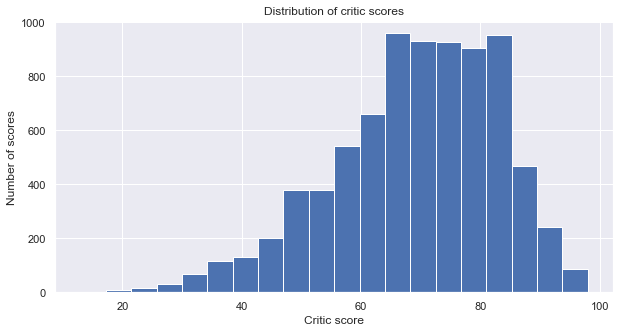

In [11]:
#look at distribution of 'critic_score'
raw_data.hist('critic_score', bins = 20, figsize = (10,5))
plt.title('Distribution of critic scores')
plt.xlabel('Critic score')
plt.ylabel('Number of scores')
plt.show()

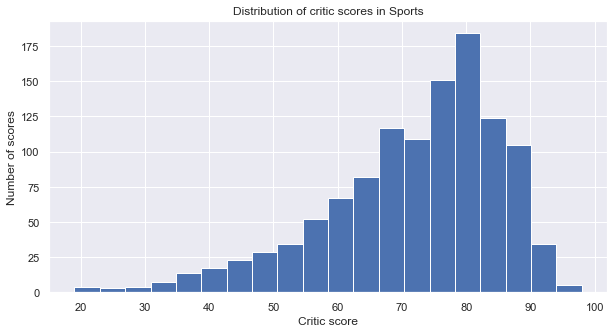

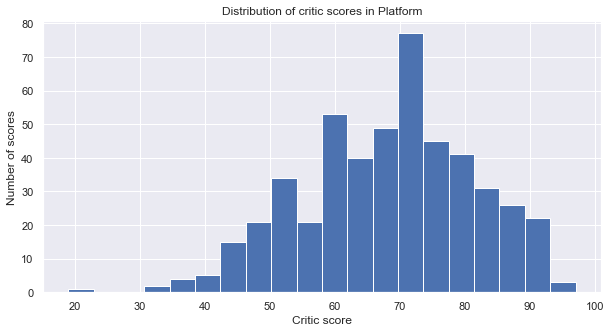

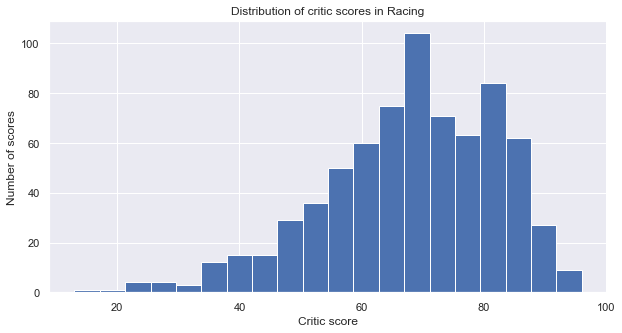

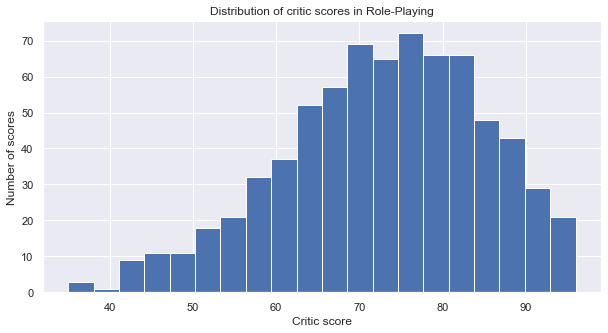

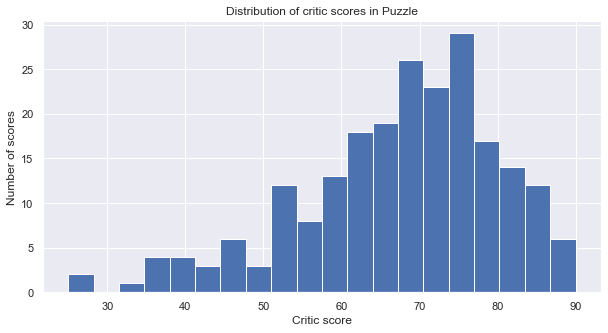

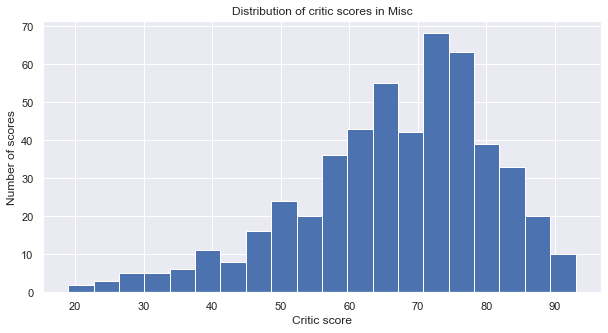

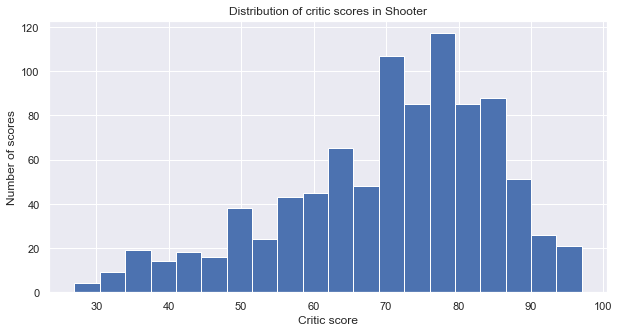

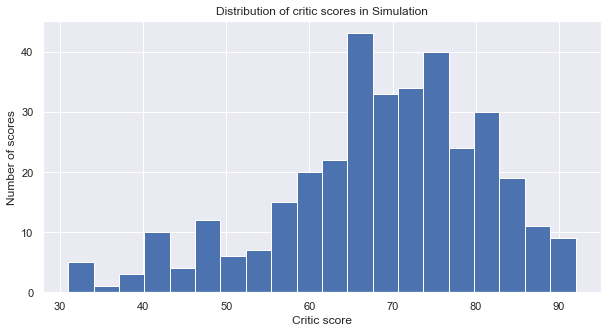

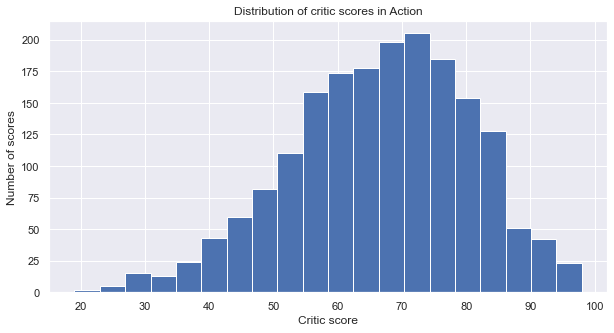

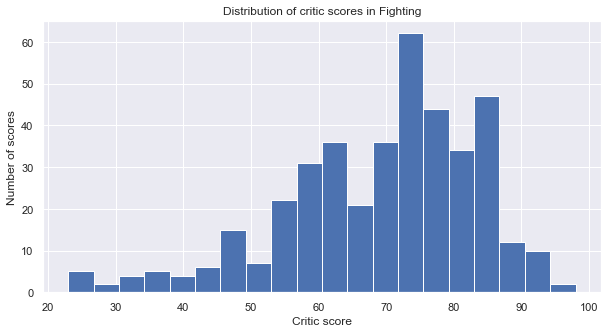

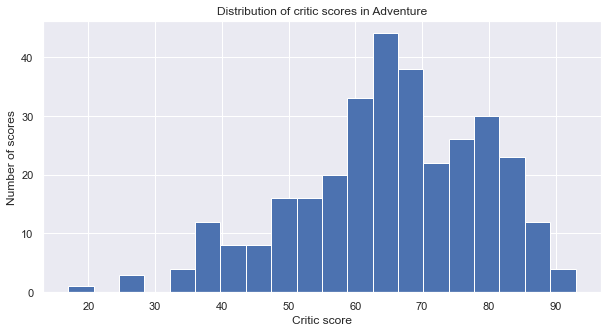

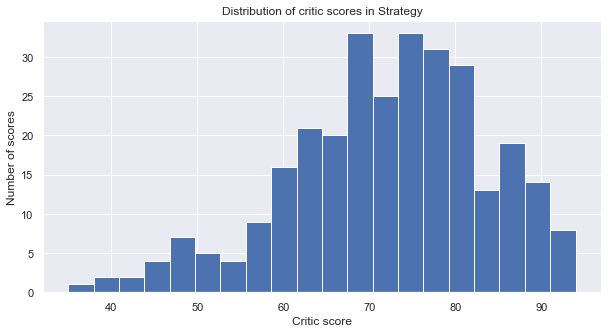

In [12]:
#look at distribution of 'critic_score' by genres
all_genres = raw_data['genre'].unique()
for genre in all_genres:
    raw_data[raw_data['genre'] == genre].hist('critic_score', bins = 20, figsize = (10,5))
    plt.title('Distribution of critic scores in {}'.format(genre))
    plt.xlabel('Critic score')
    plt.ylabel('Number of scores')
    plt.show()
    print()

In [13]:
#check unique values in 'user_score'
raw_data['user_score'].unique()

array(['8', nan, '8.3', '8.5', '6.6', '8.4', '8.6', '7.7', '6.3', '7.4',
       '8.2', '9', '7.9', '8.1', '8.7', '7.1', '3.4', '5.3', '4.8', '3.2',
       '8.9', '6.4', '7.8', '7.5', '2.6', '7.2', '9.2', '7', '7.3', '4.3',
       '7.6', '5.7', '5', '9.1', '6.5', 'tbd', '8.8', '6.9', '9.4', '6.8',
       '6.1', '6.7', '5.4', '4', '4.9', '4.5', '9.3', '6.2', '4.2', '6',
       '3.7', '4.1', '5.8', '5.6', '5.5', '4.4', '4.6', '5.9', '3.9',
       '3.1', '2.9', '5.2', '3.3', '4.7', '5.1', '3.5', '2.5', '1.9', '3',
       '2.7', '2.2', '2', '9.5', '2.1', '3.6', '2.8', '1.8', '3.8', '0',
       '1.6', '9.6', '2.4', '1.7', '1.1', '0.3', '1.5', '0.7', '1.2',
       '2.3', '0.5', '1.3', '0.2', '0.6', '1.4', '0.9', '1', '9.7'],
      dtype=object)

In [14]:
#change 'tbd' to nana, change data type
raw_data['user_score'] = raw_data['user_score'].replace('tbd', np.nan).astype('float64')

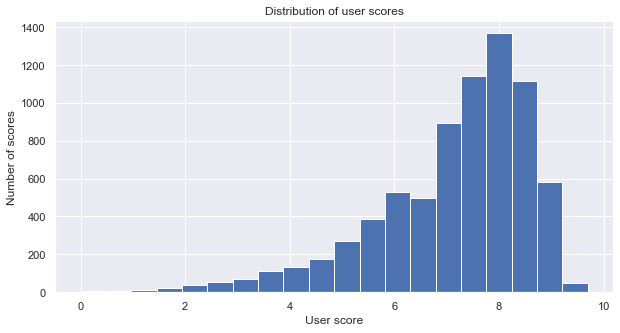

In [15]:
#look at distribution of 'user_score'
raw_data.hist('user_score', bins = 20, figsize = (10,5))
plt.title('Distribution of user scores')
plt.xlabel('User score')
plt.ylabel('Number of scores')
plt.show()

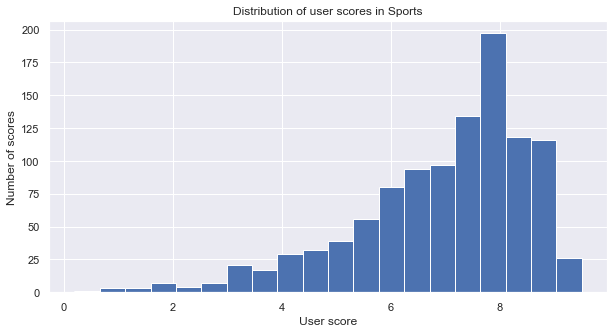

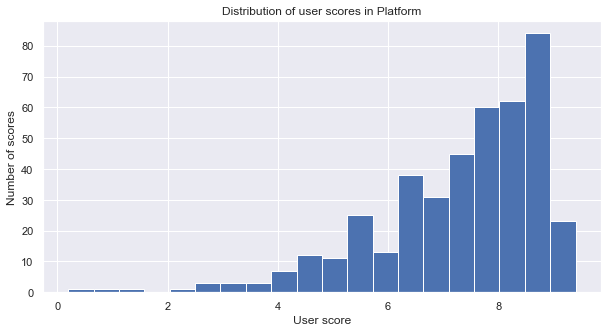

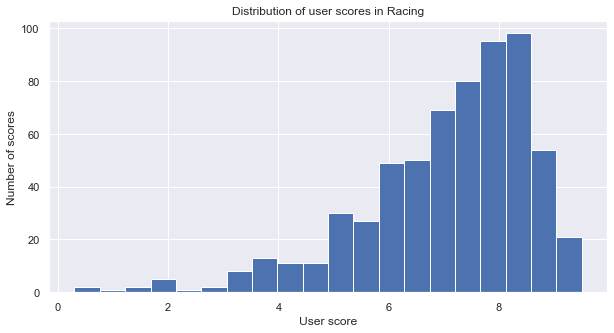

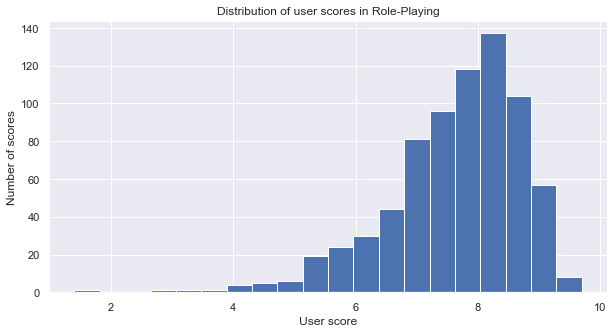

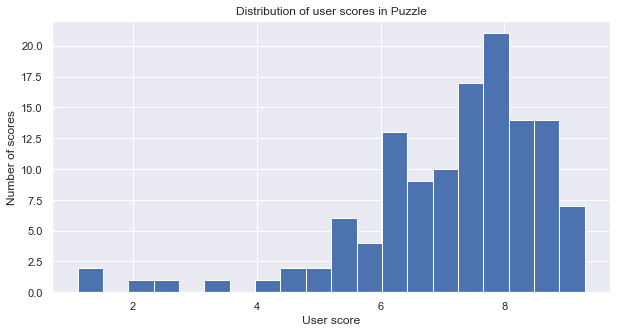

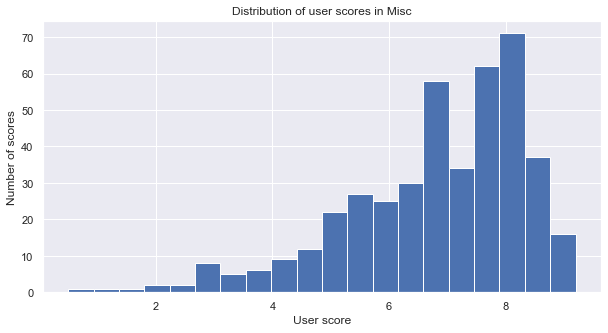

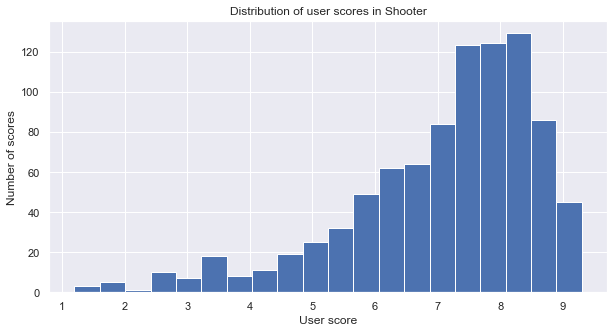

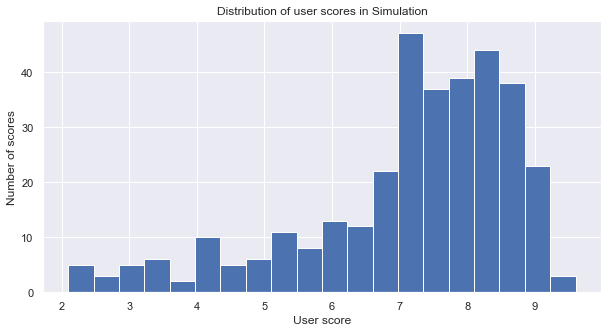

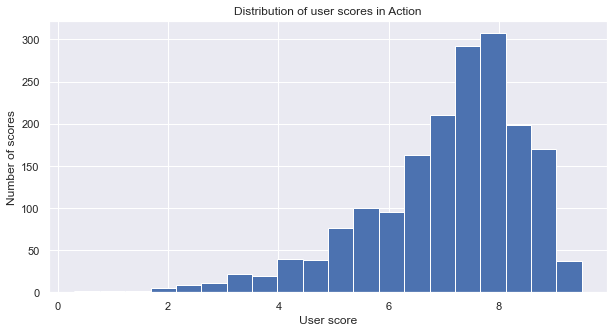

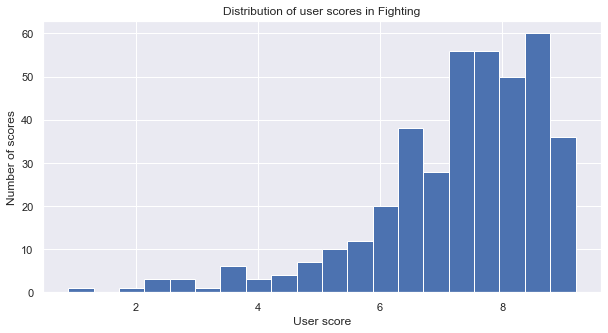

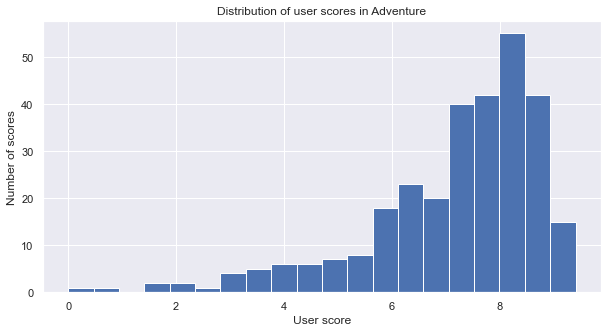

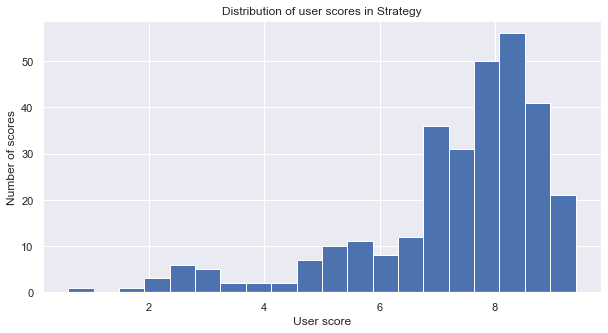

In [16]:
#look at distribution of 'user_score' by genres
for genre in all_genres:
    raw_data[raw_data['genre'] == genre].hist('user_score', bins = 20, figsize = (10,5))
    plt.title('Distribution of user scores in {}'.format(genre))
    plt.xlabel('User score')
    plt.ylabel('Number of scores')
    plt.show()
    print()

In [17]:
#look at unique values of 'rating'
raw_data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

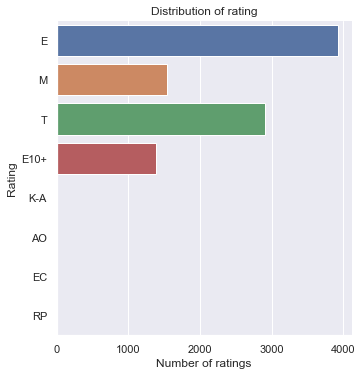

In [18]:
#look at distribution of 'rating'
sns.catplot(y = 'rating', kind = "count", data = raw_data)
plt.title('Distribution of rating')
plt.xlabel('Number of ratings')
plt.ylabel('Rating')
plt.show()

In [19]:
#change missing values of rating to 'no rating'
raw_data['rating'] = raw_data['rating'].fillna('no_rating')

<h3><a id="substep_3" style="color: black; text-decoration: none;">1.4. Change data types</a></h3>

As there are missing values in `critic_score` we cannot change data type to integer

In [20]:
#change data type of 'year_of_release' to integer
raw_data['year_of_release'] = raw_data['year_of_release'].astype('int64')

In [21]:
#copy data to a new table
data = raw_data.copy()

<h3><a id="substep_5" style="color: black; text-decoration: none;">1.5. Calculate total sales</a></h3>

In [22]:
#calculate total sales
data['total_sales'] = data['na_sales'] + data['eu_sales'] + data['jp_sales'] + data['other_sales']

<h2><a id="step_2" style="color: black; text-decoration: none;">2. Exploratory analysis</a></h2>

<h3><a id="substep_6" style="color: black; text-decoration: none;">2.1. Determine a relevant time period</a></h3>

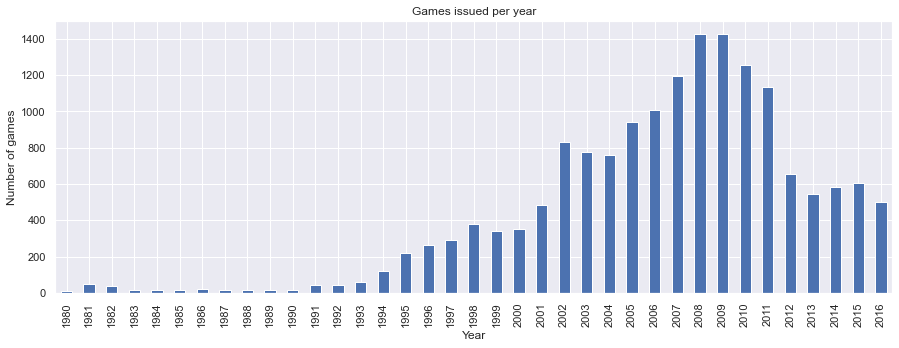

In [23]:
#look at number of games issued per year
data['year_of_release'].value_counts().sort_index().plot(kind='bar', figsize=(15,5))
plt.title('Games issued per year')
plt.xlabel('Year')
plt.ylabel('Number of games')
plt.show()

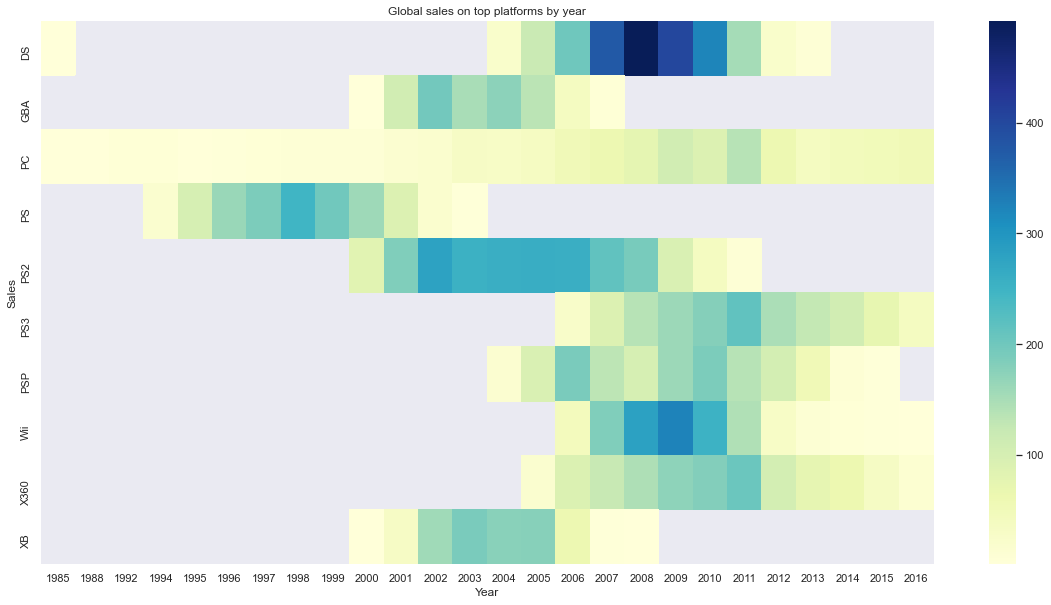

In [24]:
#look at sales of 10 platforms with largest sales
total_sales_pivot = pd.pivot_table(data, index = 'platform',values = 'total_sales', \
                    aggfunc = 'count').sort_values(by = 'total_sales', ascending = False).head(10)
platform_total_sales = total_sales_pivot.index


sales_by_year_pivot = \
pd.pivot_table(data.loc[data['platform'].isin(platform_total_sales)], index = 'platform', \
               values = 'total_sales', columns = 'year_of_release', aggfunc = 'count')

plt.subplots(figsize = (20, 10))
ax = sns.heatmap(sales_by_year_pivot, cmap="YlGnBu")
plt.title('Global sales on top platforms by year')
plt.xlabel('Year')
plt.ylabel('Sales')
plt.show()

Although data from 1980 is available we don't need to use all the years since:
- platforms exist only for 10-15 years
- platforms stay hightly profitable only for 4-6 years, 1-3 years after launch

Therefore we can use only data from 2012 to 2016 (last 5 years)

In [25]:
#drop irrelevant data
data_actual = data[data['year_of_release'] > 2011].copy()
data_actual.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2886 entries, 16 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             2886 non-null   object 
 1   platform         2886 non-null   object 
 2   year_of_release  2886 non-null   int64  
 3   genre            2886 non-null   object 
 4   na_sales         2886 non-null   float64
 5   eu_sales         2886 non-null   float64
 6   jp_sales         2886 non-null   float64
 7   other_sales      2886 non-null   float64
 8   critic_score     1312 non-null   float64
 9   user_score       1531 non-null   float64
 10  rating           2886 non-null   object 
 11  total_sales      2886 non-null   float64
dtypes: float64(7), int64(1), object(4)
memory usage: 293.1+ KB


<h3><a id="substep_7" style="color: black; text-decoration: none;">2.2. Find promising platforms</a></h3>

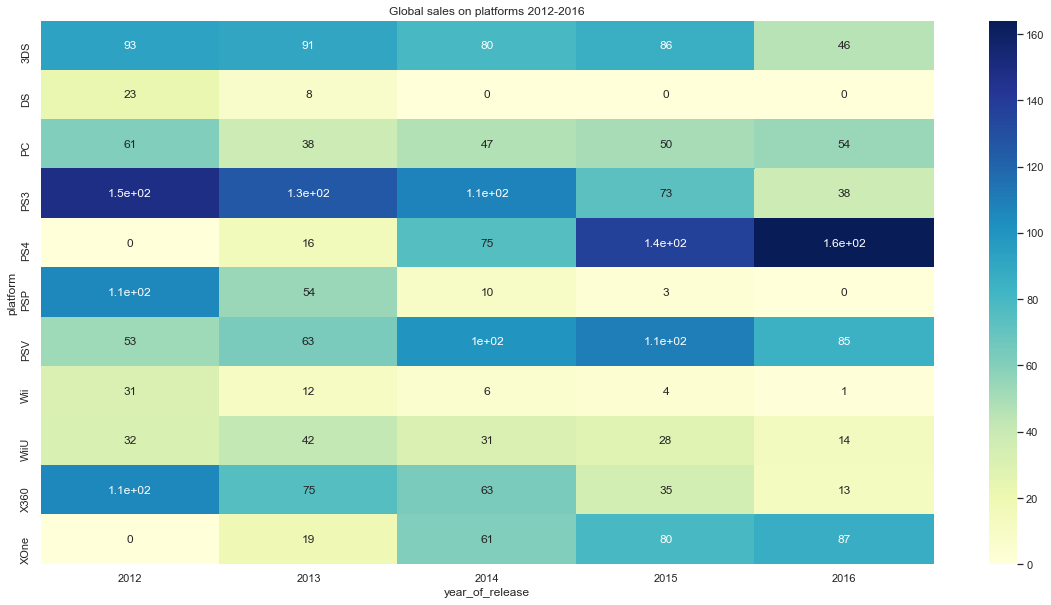

In [26]:
#look at sales of platforms
actual_sales_by_year_pivot = \
pd.pivot_table(data_actual, index = 'platform', \
               values = 'total_sales', columns = 'year_of_release', aggfunc = 'count').fillna(0)

plt.subplots(figsize = (20, 10))
ax = sns.heatmap(actual_sales_by_year_pivot, annot = True, cmap="YlGnBu")
plt.title('Global sales on platforms 2012-2016')
plt.show()

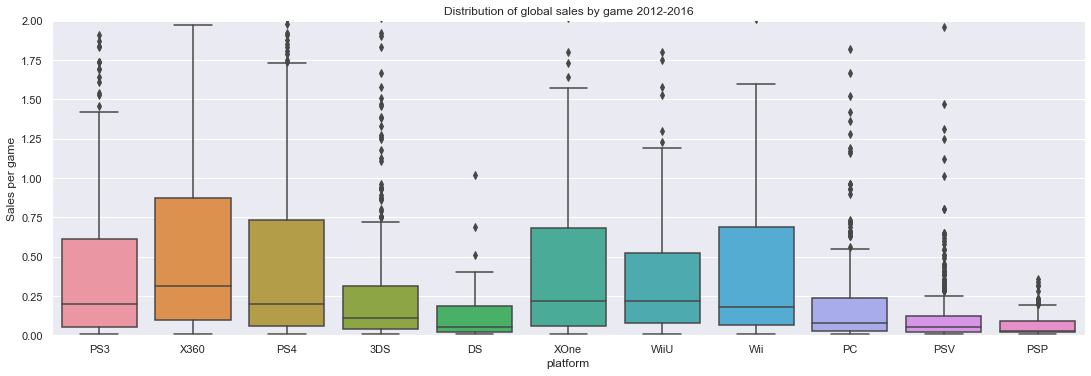

In [27]:
#look at distribution of global sales by game
g = sns.catplot(x = 'platform', y = 'total_sales', data = data_actual, \
                kind="box", height = 5, aspect=3)
g.set(ylim=(0, 2))
plt.title('Distribution of global sales by game 2012-2016')
plt.ylabel('Sales per game')
plt.show()

As we can see from the graphs above:
- 7 out of 11 platforms generated revenue equal or above 100 mln per year
- PS3, PS4, and PSV generated sold maximum of games copies per year
- PS4 (new version for PS3) and XOne (new version for X360) are the only platforms with revenues increasing
- PS and XBox stay competitive while others including Wii lose popularity
- X360, PS4, XOne and Wii issued the most profitable games with relatively high median sales

Therefore only PS4 and XOne seem to be of a high potential

<h3><a id="substep_8" style="color: black; text-decoration: none;">2.3. Estimate relationship between sales and critic, user scores</a></h3>

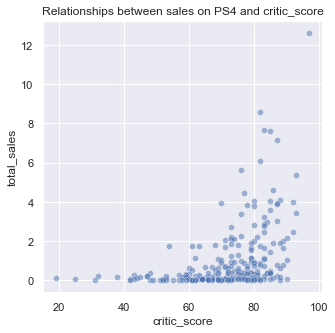

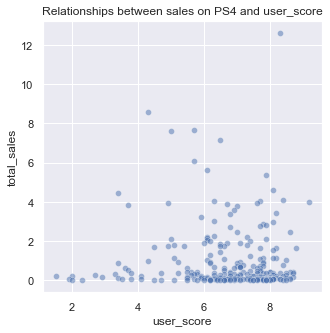


              total_sales  critic_score  user_score
total_sales      1.000000      0.405895   -0.033625
critic_score     0.405895      1.000000    0.557654
user_score      -0.033625      0.557654    1.000000




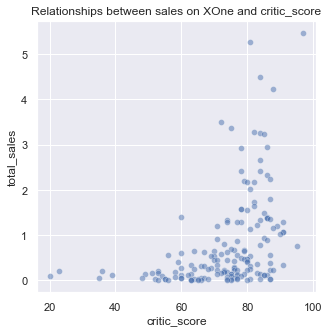

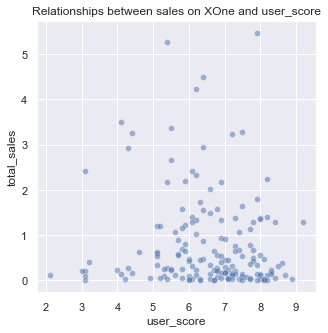


              total_sales  critic_score  user_score
total_sales      1.000000      0.410422   -0.094003
critic_score     0.410422      1.000000    0.472462
user_score      -0.094003      0.472462    1.000000




In [28]:
#look at correlation between sales and critic/ user scores
scores = ['critic_score', 'user_score']
popular_platforms = ['PS4', 'XOne']
for platform in popular_platforms:
    data_platform = data_actual[data_actual['platform'] == platform].copy()
    data_platform = data_platform.dropna(subset = ['critic_score', 'user_score']).reset_index(drop=True)
    for score in scores:
        plt.subplots(figsize = (5,5))
        sns.scatterplot(x = score, y = 'total_sales', data = data_platform, alpha = 0.5)
        plt.title('Relationships between sales on {} and {}'.format(platform, score))
        plt.show()
        print()
    print(data_platform.loc[:,['total_sales', 'critic_score', 'user_score']].corr())
    print()
    print()

Based on the correlation analysis of the most promising platforms (PS4, XOne):
- There is no interdependance between sales and user score (correlation is close to 0). It can happen because of a certain lag between purchase (after launch) and estimation (after finishing a game)
- There is a small positive interdependance between sales and user score (correlation is about 0.4). Critics have access to games before launch therefore their opinions can influence the sales

<h3><a id="substep_9" style="color: black; text-decoration: none;">2.4. Determine the most popular and profitable game genres</a></h3>

<ipython-input-29-976d9c29f873>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_genre = data_actual.groupby('genre')['name','genre'].count()


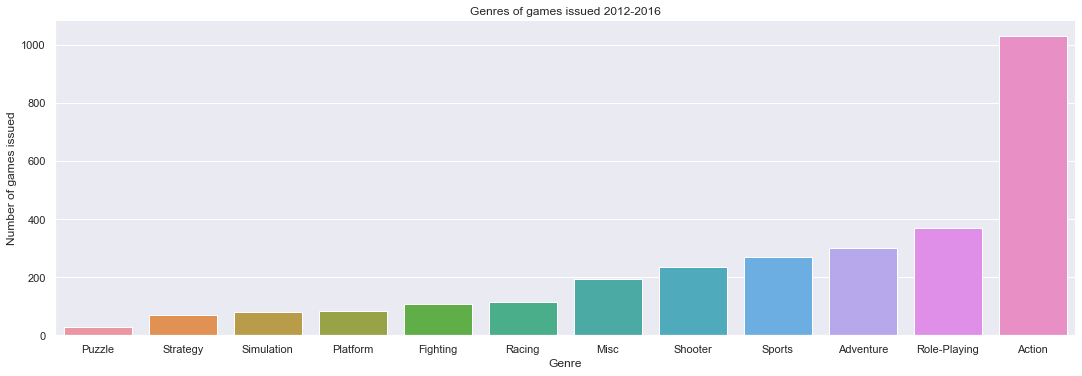

In [29]:
#look at genres popularity
data_by_genre = data_actual.groupby('genre')['name','genre'].count()
data_by_genre['name_genre'] = data_by_genre.index
data_by_genre = data_by_genre.sort_values(by = 'name')
sns.catplot(x = 'name_genre', y = 'genre', data = data_by_genre, kind = 'bar', aspect = 3)
plt.title('Genres of games issued 2012-2016')
plt.xlabel('Genre')
plt.ylabel('Number of games issued')
plt.show()

<ipython-input-30-c8ef2fdbe83b>:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_genre = data_actual.groupby('genre')['name','total_sales'].sum()


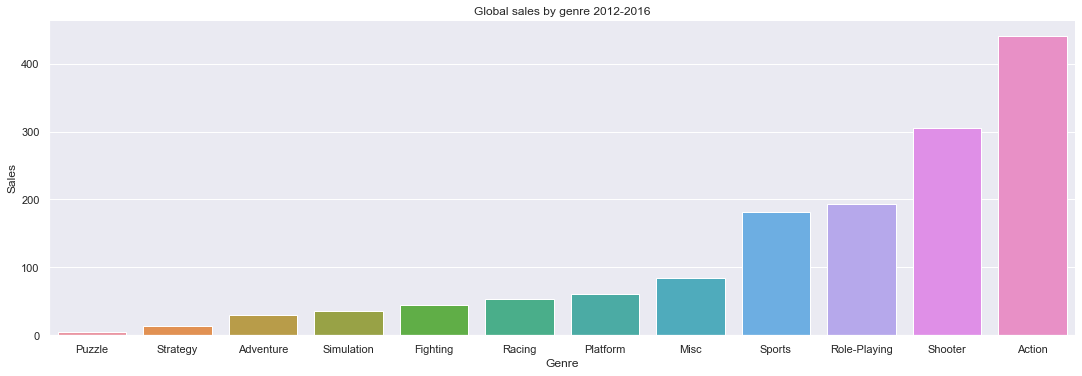

In [30]:
#look at genres profitability
data_by_genre = data_actual.groupby('genre')['name','total_sales'].sum()
data_by_genre['name_genre'] = data_by_genre.index
data_by_genre = data_by_genre.sort_values(by = 'total_sales')
sns.catplot(x = 'name_genre', y = 'total_sales', data = data_by_genre, kind = 'bar', aspect = 3)
plt.title('Global sales by genre 2012-2016')
plt.xlabel('Genre')
plt.ylabel('Sales')
plt.show()

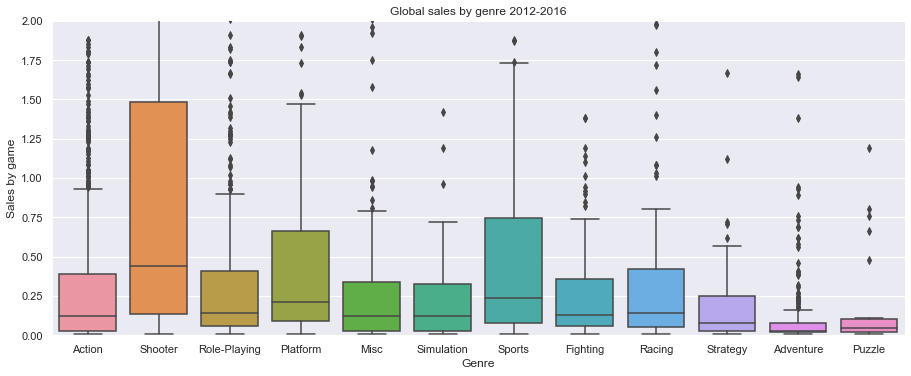

In [31]:
#look at distribution of global sales by genre
g = sns.catplot(x = 'genre', y = 'total_sales', data = data_actual, \
                kind = 'box', height = 5, aspect = 2.5)
g.set(ylim=(0, 2))
plt.title('Global sales by genre 2012-2016')
plt.xlabel('Genre')
plt.ylabel('Sales by game')
plt.show()

The graphs above show that:
- Action is the genre with the largest number of games issued, role-playing, adventure and sports follow (almost 2 times lower)
- Action and shooter seem to be the most profitable genres with role-playing and sports left a little bit below. Adventure doesn't demonstrate any good results
- Shooter has the highest median check and only sports shows the most comparatable

So, action, shooter, role-playing and sports seem to have the largest potential

<h2><a id="step_3" style="color: black; text-decoration: none;">3. Portrait of typical regional users modelling</a></h2>

We have regional splits so we can find if there are any differences in users' preferences in platforms, genres and maturity ratings

<h3><a id="substep_10" style="color: black; text-decoration: none;">3.1. Find the most popular platforms by region</a></h3>

<ipython-input-32-aa8559409668>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_region = data.groupby(column)['name', region].sum()


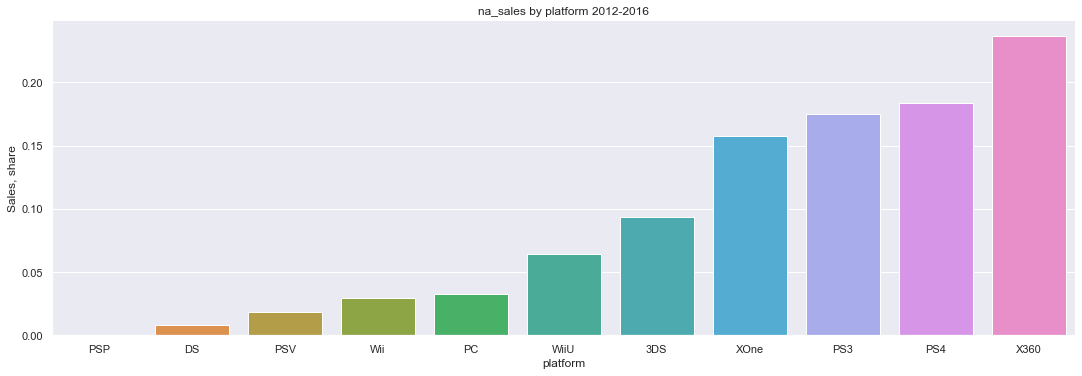

<ipython-input-32-aa8559409668>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_region = data.groupby(column)['name', region].sum()


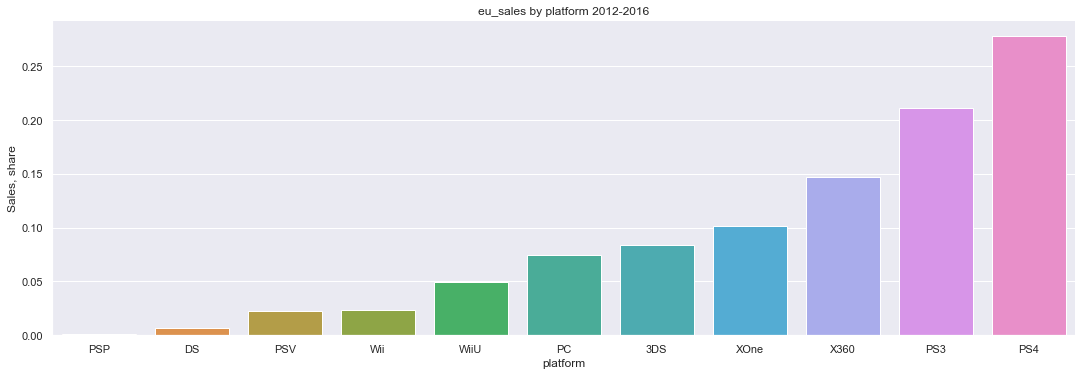

<ipython-input-32-aa8559409668>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_region = data.groupby(column)['name', region].sum()


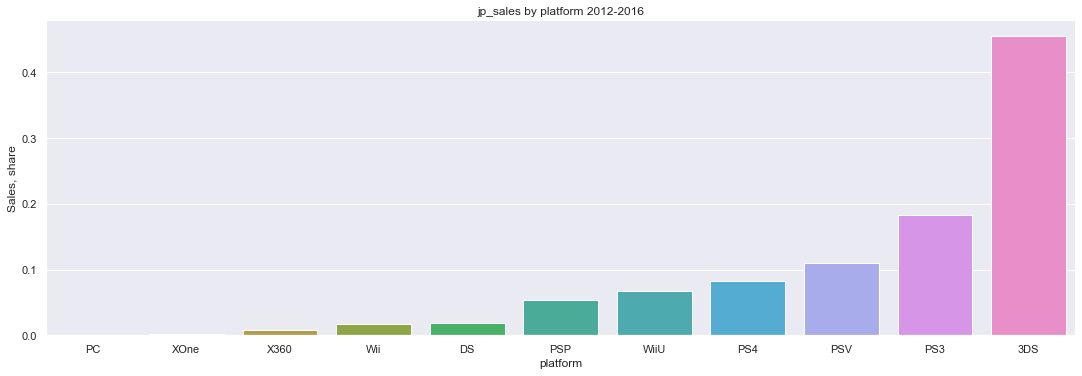

In [32]:
#look at regional sales by platform
regions = ['na_sales', 'eu_sales', 'jp_sales']
def bar_charts_by_region(data,column):
    for region in regions:
        data_by_region = data.groupby(column)['name', region].sum()
        data_by_region[column] = data_by_region.index
        data_by_region = data_by_region.sort_values(by = region)
        data_by_region[region] = data_by_region[region] / data_by_region[region].sum()
        sns.catplot(x = column, y = region, data = data_by_region, kind = 'bar', aspect = 3)
        plt.title('{} by {} 2012-2016'.format(region, column))
        plt.xlabel('{}'.format(column))
        plt.ylabel('Sales, share')    
        plt.show()
    
bar_charts_by_region(data_actual,'platform')

Several conclusions on platforms popularity:
- On the whole, preferences of users from the North America and Europe do not differ much - most popular platforms are X360, XOne, PS3 an PS4 (>70% in total). However, EU users seem to be more up to date, because they prefer the most recent version of PS (>25%) while US users stick to the more earlier version of XBox
- Japanese users seem to prefer platform made in Japan (PS by Sony and 3DS by Nintendo). American analogues (XBox) do not attract much attention

Therefore we should definitely concentrate on different platforms if we want to sell games to the North America/ Europe or to Japan

<h3><a id="substep_11" style="color: black; text-decoration: none;">3.2. Find the most popular genres by region</a></h3>

<ipython-input-32-aa8559409668>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_region = data.groupby(column)['name', region].sum()


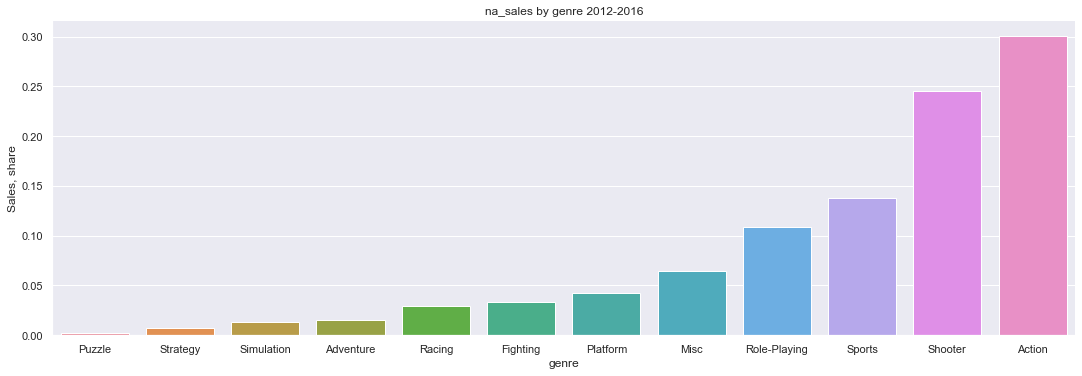

<ipython-input-32-aa8559409668>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_region = data.groupby(column)['name', region].sum()


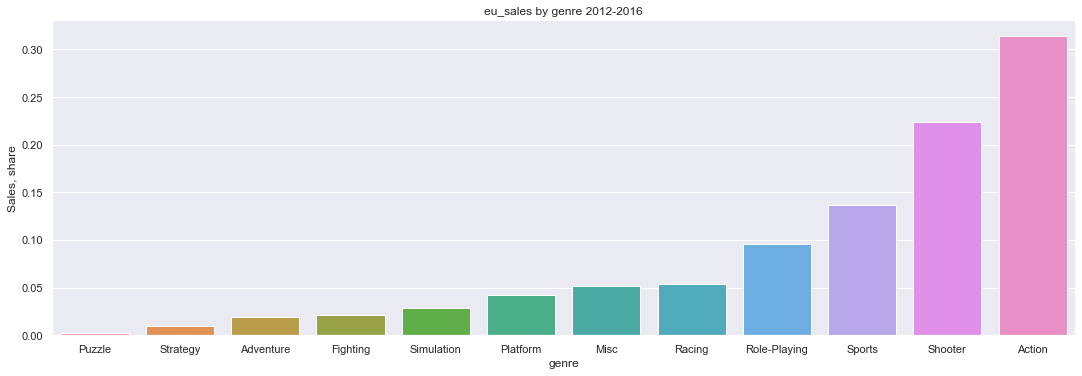

<ipython-input-32-aa8559409668>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_region = data.groupby(column)['name', region].sum()


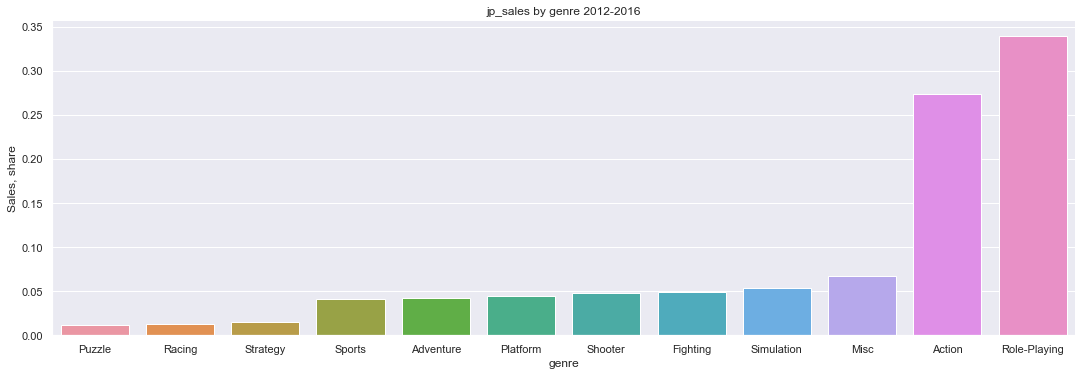

In [33]:
#look at regional sales by platform
bar_charts_by_region(data_actual,'genre')

Several conclusions on genres popularity:
- North American and European users prefer the same top-4 genres - Action, Shooter, Sports and Role-playing compise more than 75%, although other genres show different popularity
- Japanese users like Action and Role-Playing the most (>60) while other genres are almost indifferent (less than 8% each)

Therefore, Japan needs a separate genre policy

<h3><a id="substep_12" style="color: black; text-decoration: none;">3.3. Estimate relationship between ESRB rating and regional sales</a></h3>

<ipython-input-32-aa8559409668>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_region = data.groupby(column)['name', region].sum()


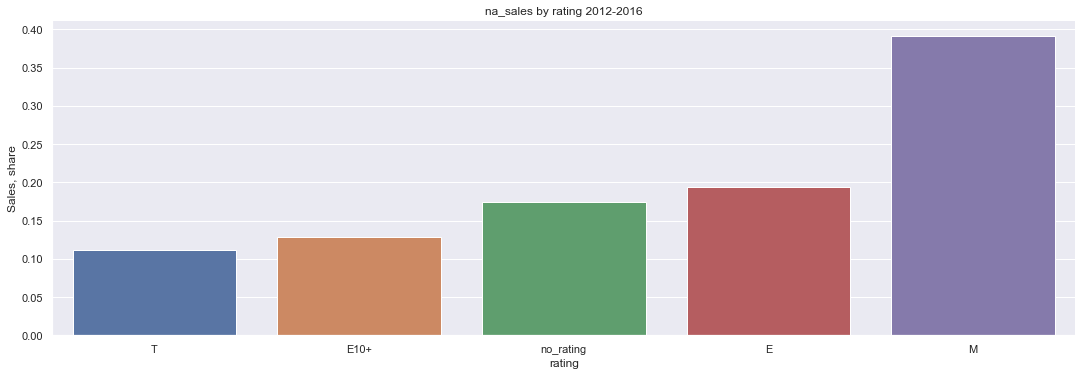

<ipython-input-32-aa8559409668>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_region = data.groupby(column)['name', region].sum()


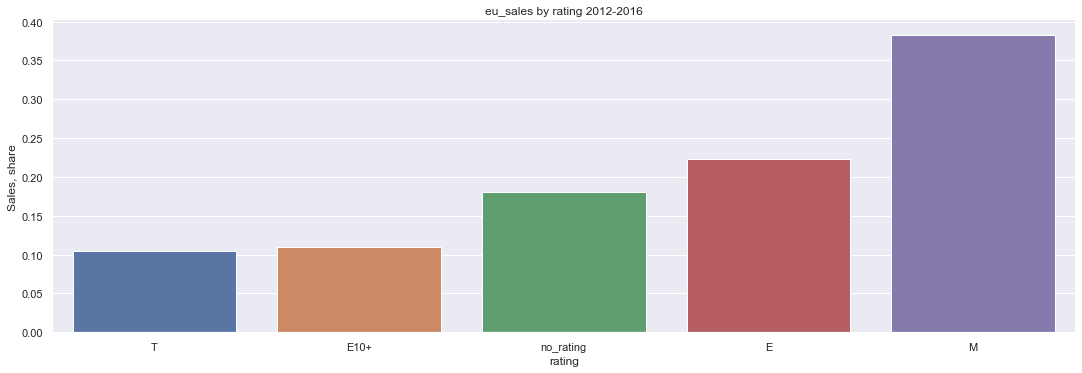

<ipython-input-32-aa8559409668>:5: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  data_by_region = data.groupby(column)['name', region].sum()


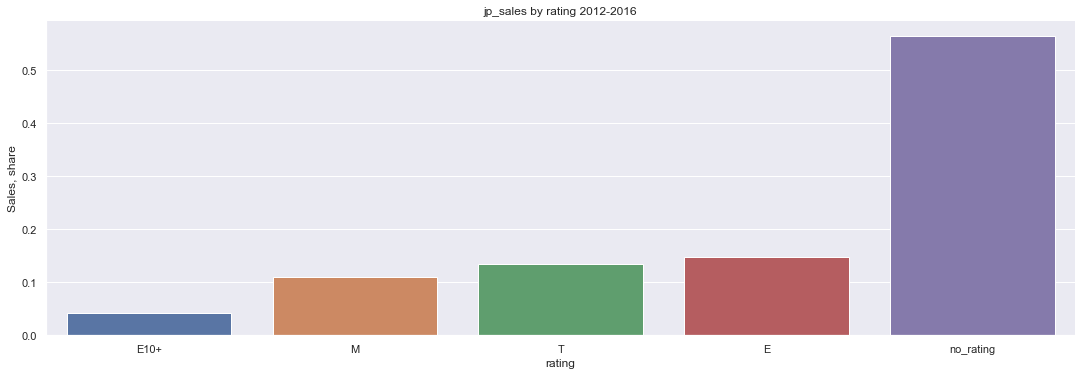

In [34]:
#look at regional sales by ESRB rating
bar_charts_by_region(data_actual,'rating')

Several conclusions on maturity ratings:
- North American and European users play in games of the same maturity ratings. Almost 40% of sales are generated by rating M - perhaps games for adults are more expenses. Games for everybody (E) are also popular (20%) because they can be played in all ages. Other games are less profitable since they cover only narrow categories (kids, teenagers) 
- Japanese users spend more on E games while games for adults are less popular

Here we can see that Japan has its own preferences that should be taken in account

<h2><a id="step_4" style="color: black; text-decoration: none;">4. Hypotheses testing</a></h2>

There are two hypotheses generated by the companies' employees and we need to test them to find more about games for sale.

<h3><a id="substep_13" style="color: black; text-decoration: none;">4.1. Hypothesis 1: XOne and PC have the same average user scores</a></h3>

<b>H0: average user scores of XOne and PC are the same

H1: average user scores of XOne and PC are different <b>

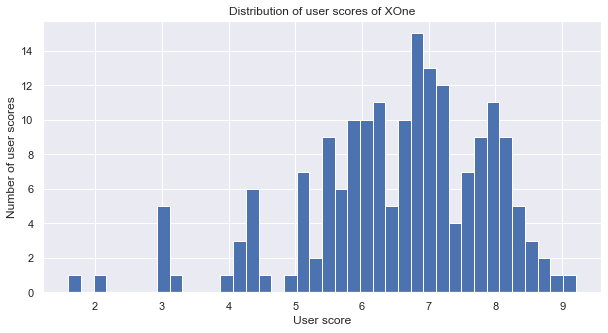

In [35]:
#look at distribution of user scores of XOne
data_actual[data_actual['platform'] == 'XOne'].hist('user_score', bins = 40, figsize = (10,5))
plt.title('Distribution of user scores of XOne')
plt.xlabel('User score')
plt.ylabel('Number of user scores')
plt.show()

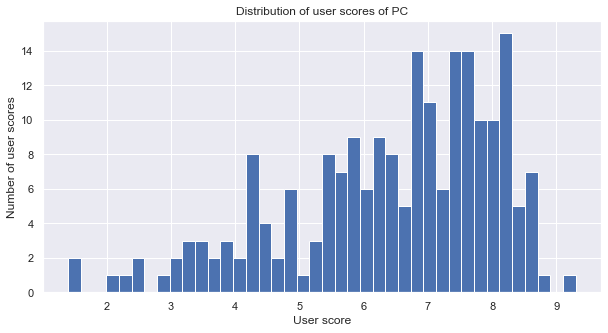

In [36]:
#look at distribution of user scores of PC
data_actual[data_actual['platform'] == 'PC'].hist('user_score', bins = 40, figsize = (10,5))
plt.title('Distribution of user scores of PC')
plt.xlabel('User score')
plt.ylabel('Number of user scores')
plt.show()

In [37]:
#count mean and variance of user ratings
print('Mean of user ratings of XOne', \
      data_actual[data_actual['platform'] == 'XOne']['user_score'].mean())
print()
print('Mean of user ratings of PC', \
      data_actual[data_actual['platform'] == 'PC']['user_score'].mean())
print()

print('Variance of user ratings of XOne', \
     data_actual[data_actual['platform'] == 'XOne']['user_score'].var())
print()
print('Variance of user ratings of PC', \
      data_actual[data_actual['platform'] == 'PC']['user_score'].var())

Mean of user ratings of XOne 6.52142857142857

Mean of user ratings of PC 6.428640776699027

Variance of user ratings of XOne 1.9069968429360702

Variance of user ratings of PC 2.7704439971584156


In [38]:
#test hyposethis 1
data_tests = data_actual.copy()
data_tests = data_tests.dropna(subset = ['user_score']).reset_index(drop = True)

alpha = 0.05

results = st.ttest_ind(data_tests[data_tests['platform'] == 'XOne']['user_score'], \
                       data_tests[data_tests['platform'] == 'PC']['user_score'], \
                       equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject H0")
else:
    print("Cannot reject H0")

p-value: 0.5489537965134912
Cannot reject H0


Mean of both XOne and PC seem to be close while variances differ a lot. This is also proven by hypothesis testing. That may be explained by the fact that some games are accessible on more than 1 platform

<h3><a id="substep_14" style="color: black; text-decoration: none;">4.2. Hypothesis 2: Action and Sports genres have different user scores</a></h3>

<b>H0: average user scores of Action and Sports are the same
    
H1: average user scores of Action and Sports are different<b>

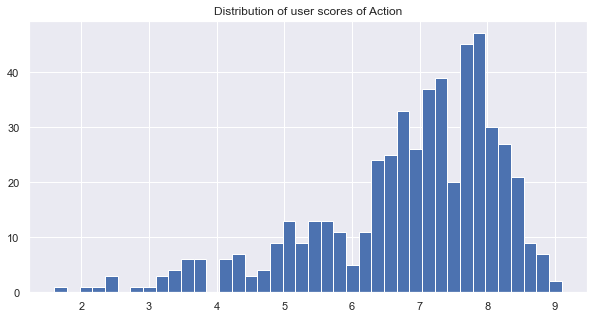

In [39]:
#look at distribution of user scores of Action
data_actual[data_actual['genre'] == 'Action'].hist('user_score', bins = 40, figsize = (10,5))
plt.title('Distribution of user scores of Action')
plt.show()

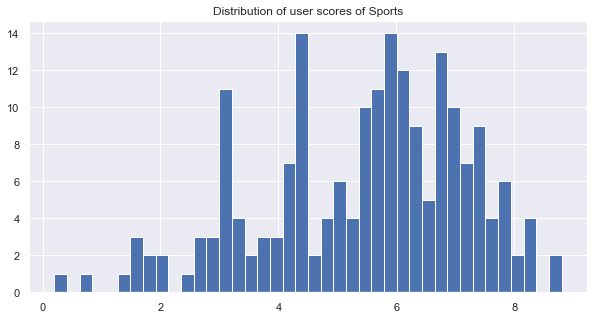

In [40]:
#look at distribution of user scores of Sports
data_actual[data_actual['genre'] == 'Sports'].hist('user_score', bins = 40, figsize = (10,5))
plt.title('Distribution of user scores of Sports')
plt.show()

In [41]:
#count mean and variance of user ratings
print('Mean of user ratings of Action', \
      data_actual[data_actual['genre'] == 'Action']['user_score'].mean())
print()
print('Mean of user ratings of Sports', \
      data_actual[data_actual['genre'] == 'Sports']['user_score'].mean())
print()

print('Variance of user ratings of Action', \
     data_actual[data_actual['genre'] == 'Action']['user_score'].var())
print()
print('Variance of user ratings of Sports', \
      data_actual[data_actual['genre'] == 'Sports']['user_score'].var())

Mean of user ratings of Action 6.825047801147237

Mean of user ratings of Sports 5.455897435897437

Variance of user ratings of Action 1.8890840494348116

Variance of user ratings of Sports 3.022890298704733


In [42]:
#test hyposethis 2

alpha = 0.05

results = st.ttest_ind(data_tests[data_tests['genre'] == 'Action']['user_score'], \
                       data_tests[data_tests['genre'] == 'Sports']['user_score'], \
                       equal_var = False)

print('p-value:', results.pvalue)

if results.pvalue < alpha:
    print("Reject H0")
else:
    print("Cannot reject H0")

p-value: 4.24307776572644e-20
Reject H0


Mean of both Action and Sports seem to differ as well as variances. So, in general Action games have higher results. Perhaps good ratings are due to captivating plots

<h2><a id="conclusion" style="color: black; text-decoration: none;">5. Conclusion</a></h2>

As a result we can conlude that:
- PS4 and XOne demonstrate increasing popularity in general, while their popularity depends on the market a lot
- Action, shooter, role-playing and sports seem to attract most interest from users, but there are certain market differences (Japan)
- Games for everybody and maturity games are of high popularity, though it also depends on the market
- Critic scores influence somehow sales but user scores do not matter
- User scores of PC and XOne are similar
- User score of Action and Sports differ